In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('mobile.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<AxesSubplot:>

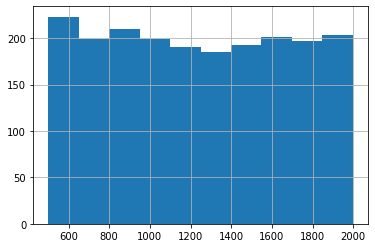

In [3]:
data.battery_power.hist()

<AxesSubplot:xlabel='n_cores'>

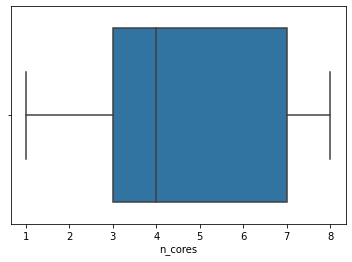

In [4]:
sns.boxplot(data['n_cores'])

In [5]:
df3=data.copy()

In [6]:
i=10
original=[]
while(i<2000):
    original.append(data.n_cores.loc[i])
    data.n_cores.loc[i]=np.nan
    i+=10
data.head(11)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2.0,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3.0,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5.0,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6.0,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2.0,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1.0,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8.0,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4.0,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7.0,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5.0,...,1137,1224,513,19,10,12,1,0,0,0


In [7]:
df=data.copy()

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
x=df.iloc[:,df.columns!='n_cores'].values
y=df['n_cores'].values

In [10]:
from sklearn.preprocessing import StandardScaler
ssl=StandardScaler()
x=ssl.fit_transform(x)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [12]:
dfnan=data[data['n_cores'].isnull()]

In [13]:
dfnan.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1950,1561,1,1.6,1,1,1,27,0.8,174,NaN,...,662,874,1205,12,7,3,1,1,0,1
1960,1063,0,2.0,0,0,0,27,0.2,86,NaN,...,201,582,2668,12,5,19,0,0,0,2
1970,1913,1,1.8,0,0,0,29,0.6,111,NaN,...,675,742,2023,17,13,8,1,1,0,2
1980,930,1,1.0,1,4,1,4,0.9,144,NaN,...,1017,1289,2016,13,10,16,1,1,1,1
1990,1617,1,2.4,0,8,1,36,0.8,85,NaN,...,743,1426,296,5,3,7,1,0,0,0


In [14]:
x2=dfnan.iloc[:,dfnan.columns!='n_cores'].values
x2=ssl.fit_transform(x2)

In [15]:
k=rf.predict(x2)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(original,k)

0.12562814070351758

In [17]:
df4=df3.copy()

In [18]:
mode=df3.n_cores.mode()

In [19]:
mode

0    4
dtype: int64

In [20]:
count=0
for i in original:
    if(i==4):
        count+=1

In [21]:
count

21

In [22]:
i=10
contorg=[]
while(i<2000):
    contorg.append(df4.battery_power.loc[i])
    df4.battery_power.loc[i]=np.nan
    i+=10

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
df5=df4.dropna()

In [24]:
X=df5.iloc[:,df5.columns!='battery_power'].values
Y=df5['battery_power'].values
X=ssl.fit_transform(X)

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
rfr=RandomForestRegressor()

In [52]:
rfr.fit(X,Y)
lr.fit(X,Y)

LinearRegression()

In [53]:
dfnan2=df4[df4['battery_power'].isnull()]
dfnan2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
10,NaN,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
20,NaN,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
30,NaN,1,0.5,1,0,0,5,0.2,88,7,...,1358,1739,3532,17,11,12,0,0,1,3
40,NaN,0,2.9,0,5,0,44,0.6,132,1,...,434,967,2484,18,2,11,1,0,1,2
50,NaN,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2


In [54]:
xi=dfnan2.iloc[:,dfnan2.columns!='battery_power'].values
xi=ssl.fit_transform(xi)

In [56]:
ans=rfr.predict(xi)
ans2=lr.predict(xi)

In [57]:
contorg

[769,
 772.0,
 1579.0,
 1347.0,
 1547.0,
 1484.0,
 1448.0,
 1589.0,
 1724.0,
 1883.0,
 783.0,
 1701.0,
 1414.0,
 1753.0,
 843.0,
 1481.0,
 1270.0,
 703.0,
 596.0,
 1703.0,
 1395.0,
 850.0,
 1488.0,
 633.0,
 893.0,
 754.0,
 1066.0,
 1733.0,
 1893.0,
 1937.0,
 1414.0,
 728.0,
 662.0,
 821.0,
 609.0,
 809.0,
 1108.0,
 1874.0,
 1836.0,
 1266.0,
 1029.0,
 1456.0,
 1887.0,
 1310.0,
 712.0,
 1742.0,
 752.0,
 1417.0,
 685.0,
 1278.0,
 687.0,
 1875.0,
 1076.0,
 504.0,
 1408.0,
 1168.0,
 1572.0,
 1164.0,
 612.0,
 1170.0,
 1430.0,
 972.0,
 1645.0,
 600.0,
 1315.0,
 568.0,
 638.0,
 658.0,
 1403.0,
 561.0,
 663.0,
 1702.0,
 1049.0,
 1004.0,
 1276.0,
 1432.0,
 1911.0,
 1042.0,
 911.0,
 1439.0,
 691.0,
 1387.0,
 571.0,
 1973.0,
 840.0,
 1829.0,
 1673.0,
 1554.0,
 1132.0,
 1005.0,
 1205.0,
 934.0,
 1558.0,
 1456.0,
 1382.0,
 1596.0,
 904.0,
 1597.0,
 1483.0,
 594.0,
 683.0,
 1119.0,
 1681.0,
 1154.0,
 718.0,
 1408.0,
 1659.0,
 1076.0,
 1245.0,
 741.0,
 745.0,
 1018.0,
 1975.0,
 802.0,
 877.0,
 1159.0,

In [58]:
ans

array([1484.35, 1496.32, 1116.98, 1566.69, 1488.94, 1434.22, 1247.08,
       1245.5 , 1443.57, 1597.04,  815.93, 1138.8 , 1151.62, 1533.72,
       1066.21,  934.01, 1429.91,  746.47,  748.51, 1188.94, 1626.46,
       1281.87, 1389.02,  703.79,  971.43, 1365.48, 1028.36, 1328.36,
       1366.2 , 1278.41, 1442.11, 1245.69,  780.62,  968.64,  704.27,
       1517.26, 1375.92, 1521.91, 1727.13, 1279.24, 1263.87, 1348.65,
       1184.31,  812.02,  750.08, 1581.23, 1372.51, 1149.6 ,  866.98,
       1006.52, 1224.84, 1429.72, 1169.29, 1098.16, 1178.73, 1584.18,
       1467.66, 1290.72,  743.48,  923.68, 1099.45, 1064.19, 1191.81,
        808.66, 1196.95, 1035.67,  927.55, 1285.47, 1308.36, 1091.52,
        957.04, 1607.08, 1246.03, 1311.27, 1232.3 , 1370.88, 1269.55,
       1301.54, 1258.33, 1219.04, 1388.98, 1114.25,  874.4 , 1701.44,
       1308.01, 1549.47, 1429.14, 1294.17,  972.47, 1323.94, 1278.41,
       1250.95, 1288.3 , 1217.34, 1028.49, 1455.61, 1406.16, 1138.72,
       1323.84,  827

In [59]:
from sklearn.metrics import mean_squared_error

In [69]:
mean_squared_error(ans,contorg)


130042.41131005024

In [62]:
dat1=pd.DataFrame(data=contorg,columns=['original'])
dat2=pd.DataFrame(data=ans,columns=['predicted_rf'])
dat3=pd.DataFrame(data=ans2,columns=['predicted_linreg'])
find=pd.concat([dat1,dat2,dat3],axis=1)

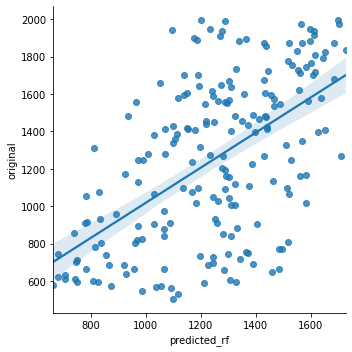

In [64]:
sns.lmplot(x='predicted_rf',y='original',data=find)
plt.show()

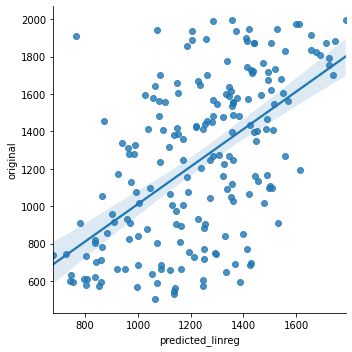

In [65]:
sns.lmplot(x='predicted_linreg',y='original',data=find)
plt.show()

In [67]:
find.head(20)

,original,predicted_rf,predicted_linreg
0,769.0,1484.35,1249.496485
1,772.0,1496.32,1411.604749
2,1579.0,1116.98,1057.067835
3,1347.0,1566.69,1449.035995
4,1547.0,1488.94,1514.973590
5,1484.0,1434.22,1381.533233
6,1448.0,1247.08,1280.017047
7,1589.0,1245.50,1343.692506
8,1724.0,1443.57,1437.434757
9,1883.0,1597.04,1747.270715


In [72]:
from xgboost import XGBClassifier

In [73]:
dir(XGBClassifier)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 '_wrap_evaluation_matrices',
 'apply',
 'coef_',
 'evals_result',
 'feature_importances_',
 'fit',
 'get_booster',
 'get_num_boosting_rounds',
 'get_params',
 'get_xgb_params',
 'intercept_',
 'load_model',
 'predict',
 'predict_proba',
 'save_model',
 'score',
 'set_params']

In [74]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective='binary:logistic', use_label_encoder=True, **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |      use_label_encoder : bool
 |          (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new code,
 |          we recommend that you set this parameter to False.
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective func